Let's first setup our imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
data, target = datasets.load_iris(return_X_y=True)
iris = datasets.load_iris()

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


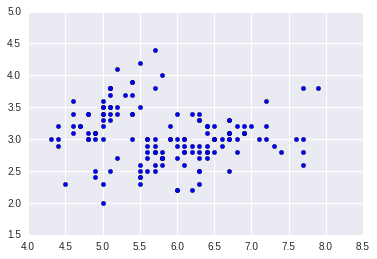

In [4]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

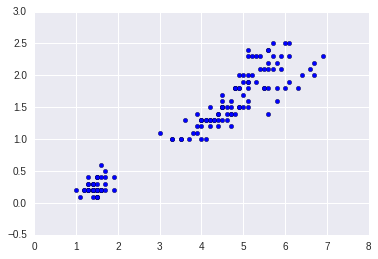

In [5]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

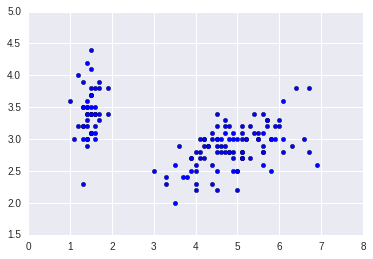

In [6]:
plt.scatter(df['petal length (cm)'], df['sepal width (cm)'])

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [7]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [16]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
df['labels'] = labels

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

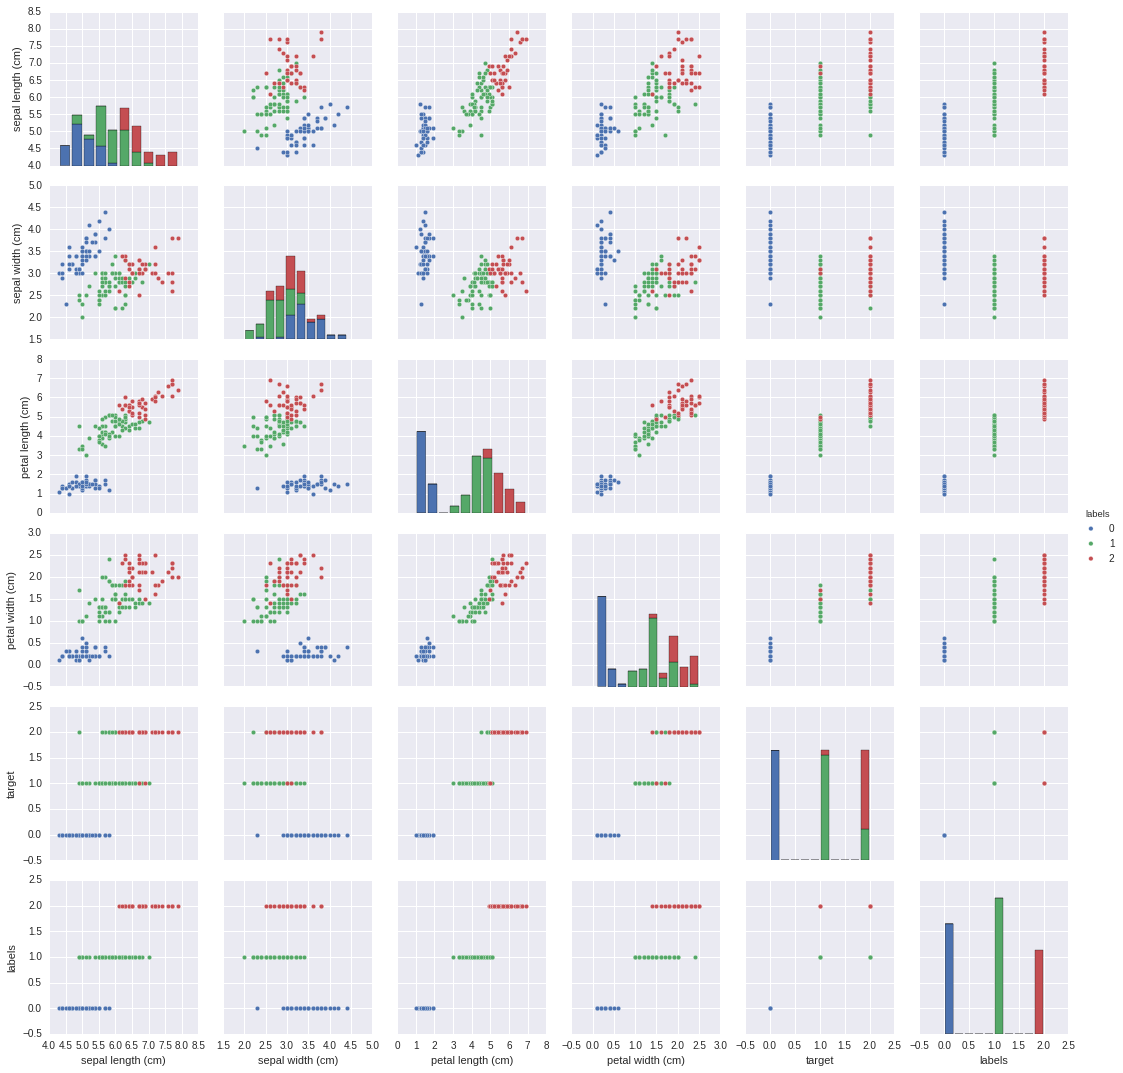

In [17]:
sns.pairplot(data=df, hue='labels')

Plot the predicted vs actual classifcations to see how our clustering analysis compares

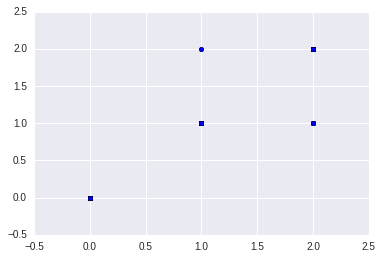

In [18]:
plt.scatter(df['target'], df['labels'])

Check the centroids to see where each cluster is lying 

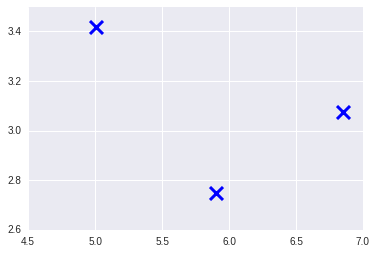

In [19]:
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3, zorder=10)

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

In [20]:
metrics.accuracy_score(df['target'], df['labels'])

0.89333333333333331

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [21]:
metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')

0.55259194453090321

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [22]:
print metrics.classification_report(df['target'], df['labels'])

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        50
        1.0       0.77      0.96      0.86        50
        2.0       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



Compute the Confusion Matrix to test the performance of the clustering analysis

In [23]:
print metrics.confusion_matrix(df['target'], df['labels'])

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
